In [46]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import to_categorical

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [30]:
# Check training will be done on GPU
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")
    

Default GPU Device: /device:GPU:0


In [31]:
# Loading Fashion MNIST training and test dataset

fashion_mnist_train = pd.read_csv('/Users/senst/Documents/Tensorflow/Deep Learning Projects/data/MNIST Fashion/fashion-mnist_train.csv')
fashion_mnist_test  = pd.read_csv('/Users/senst/Documents/Tensorflow/Deep Learning Projects/data/MNIST Fashion/fashion-mnist_test.csv')

fashion_mnist_train.shape, fashion_mnist_test.shape

((60000, 785), (10000, 785))

In [47]:
# Creating the Model

# Convolution & Max-Pooling layers
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.50))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.50))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Adding the fully connected layers to CNN
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 3, 3, 64)         

In [48]:
# Compiling the Model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [49]:
# Prepping dataset
X = np.array(fashion_mnist_train.iloc[:, 1:])
y = to_categorical(np.array(fashion_mnist_train.iloc[:, 0]))

# Data split of 30%
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Test data
X_test = np.array(fashion_mnist_test.iloc[:, 1:])
y_test = to_categorical(np.array(fashion_mnist_test.iloc[:, 0]))

X_train.shape, X_val.shape, X_test.shape

((42000, 784), (18000, 784), (10000, 784))

In [50]:
# Reshaping the dataset in (28, 28, 1) in order to feed into neural network
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)

# Changing the dataset to float & normalising
X_train = X_train.astype('float32')/255
X_val = X_val.astype('float32')/255
X_test = X_test.astype('float32')/255

# Examining the new shape of the dataset
X_train.shape, X_val.shape, X_test.shape

((42000, 28, 28, 1), (18000, 28, 28, 1), (10000, 28, 28, 1))

In [51]:
EPOCHS = 20
BATCH = 256
# Fit the CNN model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=EPOCHS, batch_size=BATCH)

Train on 42000 samples, validate on 18000 samples
Epoch 1/20
42000/42000 [==============================] - 1s 35us/sample - loss: 0.9448 - accuracy: 0.6476 - val_loss: 0.5971 - val_accuracy: 0.7782
Epoch 2/20
42000/42000 [==============================] - 1s 20us/sample - loss: 0.5806 - accuracy: 0.7790 - val_loss: 0.4916 - val_accuracy: 0.8262
Epoch 3/20
42000/42000 [==============================] - 1s 20us/sample - loss: 0.5108 - accuracy: 0.8090 - val_loss: 0.4393 - val_accuracy: 0.8411
Epoch 4/20
42000/42000 [==============================] - 1s 19us/sample - loss: 0.4651 - accuracy: 0.8280 - val_loss: 0.3994 - val_accuracy: 0.8604
Epoch 5/20
42000/42000 [==============================] - 1s 20us/sample - loss: 0.4310 - accuracy: 0.8418 - val_loss: 0.3985 - val_accuracy: 0.8590
Epoch 6/20
42000/42000 [==============================] - 1s 20us/sample - loss: 0.4174 - accuracy: 0.8463 - val_loss: 0.3643 - val_accuracy: 0.8671
Epoch 7/20
42000/42000 [==============================] 

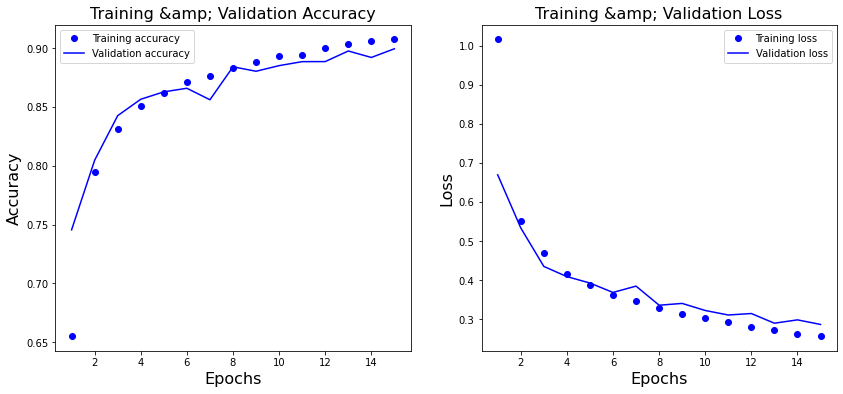

In [37]:
import matplotlib.pyplot as plt
  
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
  
epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot the model accuracy vs Epochs
ax[0].plot(epochs, accuracy, 'bo', label='Training accuracy')
ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax[0].set_title('Training &amp; Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()

# Plot the loss vs Epochs
ax[1].plot(epochs, loss_values, 'bo', label='Training loss') 
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training &amp; Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

In [38]:

# Evaluate the model accuracy and loss on the test dataset
test_loss, test_acc = model.evaluate(X_test, y_test)

# Print the loss and accuracy
test_loss, test_acc

10000/10000 [==============================] - 0s 42us/sample - loss: 0.2789 - accuracy: 0.9018


(0.2788837134361267, 0.9018)

In [41]:
# Save the model
model.save('CNN_Fashion_Recog_Model.h5')

In [40]:
# # Re-Loading model
# validate_model = tf.keras.models.load_model('CNN_Fashion_Recog_Model.h5')

# # Show the model architecture
# validate_model.summary()
